## Apply SVM to Wisconsin breast cancer dataset
Dataset is included with ```sklearn``` but comes from:
W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computer-derived nuclear features distinguish malignant from benign breast cytology. Human Pathology, 26:792--796, 1995.

Here, fine-needle aspirates (FNA; a type of biopsy) of breast mass are obtained, imaged, and the digitized images are processed to extract features pertaining to the characteristics of the cell nuclei present in the image. The goal is to classify each biopsy as **malignant** or **benign** based on the image.

Ten real-valued features are computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

For each image, across nuceli, the mean, standard error,
and "worst" or largest (mean of the three largest values) of these features were computed. This yields **30 features per sample**.
For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
#Functions from last time to visualize classifier boundaries
def make_meshgrid(X, ngrid=100, slack=0.2):
    if len(X.shape) > 2:
        warnings.warn('Grid visualization only work for 2D or less!')
    xmin, xmax = X[:, 0].min(),  X[:, 0].max()
    ymin, ymax = X[:, 1].min(),  X[:, 1].max()
    
    # Apply some slack so points are are not near the edge
    xmin *= 1 - np.sign(xmin) * slack
    xmax *= 1 + np.sign(xmax) * slack
    ymin *= 1 - np.sign(ymin) * slack
    ymax *= 1 + np.sign(ymax) * slack
    
    dx = (xmax - xmin) / ngrid
    dy = (ymax - ymin) / ngrid
    x = np.arange(xmin, xmax, dx)
    y = np.arange(ymin, ymax, dy)
    xx, yy = np.meshgrid(x, y)
    return (xx, yy)


def plot_decision(xx, yy, clf, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

### Load Data and view first few points

In [3]:
dat = load_breast_cancer()
X = dat.data
y = dat.target

print('This data has ' + str(X.shape[0]) + ' data points with ' + str(X.shape[1]) + ' features \n')  

print('Lets look at 5 samples in columns')
X[:5,:].T


This data has 569 data points with 30 features 

Lets look at 5 samples in columns


array([[1.799e+01, 2.057e+01, 1.969e+01, 1.142e+01, 2.029e+01],
       [1.038e+01, 1.777e+01, 2.125e+01, 2.038e+01, 1.434e+01],
       [1.228e+02, 1.329e+02, 1.300e+02, 7.758e+01, 1.351e+02],
       [1.001e+03, 1.326e+03, 1.203e+03, 3.861e+02, 1.297e+03],
       [1.184e-01, 8.474e-02, 1.096e-01, 1.425e-01, 1.003e-01],
       [2.776e-01, 7.864e-02, 1.599e-01, 2.839e-01, 1.328e-01],
       [3.001e-01, 8.690e-02, 1.974e-01, 2.414e-01, 1.980e-01],
       [1.471e-01, 7.017e-02, 1.279e-01, 1.052e-01, 1.043e-01],
       [2.419e-01, 1.812e-01, 2.069e-01, 2.597e-01, 1.809e-01],
       [7.871e-02, 5.667e-02, 5.999e-02, 9.744e-02, 5.883e-02],
       [1.095e+00, 5.435e-01, 7.456e-01, 4.956e-01, 7.572e-01],
       [9.053e-01, 7.339e-01, 7.869e-01, 1.156e+00, 7.813e-01],
       [8.589e+00, 3.398e+00, 4.585e+00, 3.445e+00, 5.438e+00],
       [1.534e+02, 7.408e+01, 9.403e+01, 2.723e+01, 9.444e+01],
       [6.399e-03, 5.225e-03, 6.150e-03, 9.110e-03, 1.149e-02],
       [4.904e-02, 1.308e-02, 4.006e-02,

### Preprocessing: Normalize Features and Reduce Dimensionality

In [4]:
X = StandardScaler().fit_transform(X) #Z-score data

#PCA
pc = PCA(n_components=2)
X_pc = pc.fit_transform(X)
var_exp = pc.explained_variance_ratio_.sum() * 100

print('Our ' + str(X_pc.shape[1]) + ' principal components can explain ' + str(np.round(var_exp*10)/10) + '% of the variance \n')
print('Variance explained by each principal componenet:' + str(pc.explained_variance_ratio_))


Our 2 principal components can explain 63.2% of the variance 

Variance explained by each principal componenet:[0.44272026 0.18971182]


### View data in our transformed space

Text(0, 0.5, 'PC2')

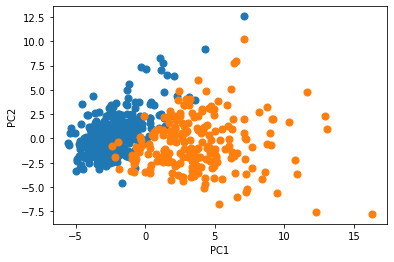

In [5]:
plt.figure()
plt.scatter(X_pc[y.astype(bool),0],X_pc[y.astype(bool),1],s=50)
plt.scatter(X_pc[~y.astype(bool),0],X_pc[~y.astype(bool),1],s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')


### Split data into test and train sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_pc, y, train_size=0.70)

### Train and Test a SVM

In [7]:
clf = SVC(kernel='rbf', gamma=0.01,C=1)
clf.fit(X_train,y_train)
score_train = clf.score(X_train,y_train) * 100
score_test = clf.score(X_test,y_test) * 100

print('Test accuracy: ' + str(round(score_test*10)/10) + '\nTrain accuracy: ' + str(round(score_train*10)/10) + '%')


Test accuracy: 96.5
Train accuracy: 93.5%


### Visualize Boundary

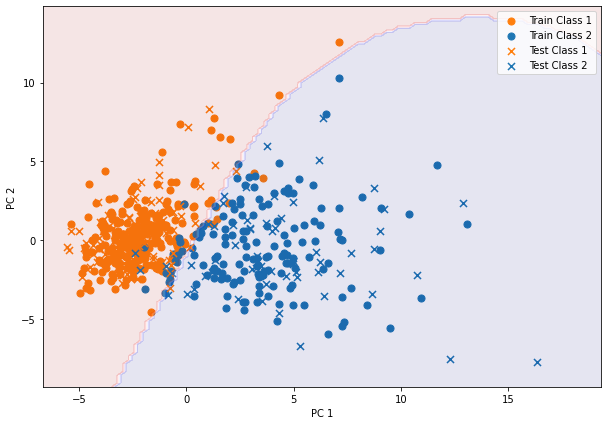

In [8]:
xx,yy = make_meshgrid(X_pc)
plt.figure(figsize=(10,7))
plt.scatter(X_train[y_train.astype(bool),0],X_train[y_train.astype(bool),1],s=50,color = 'Tab:orange', label = 'Train Class 1')
plt.scatter(X_train[~y_train.astype(bool),0],X_train[~y_train.astype(bool),1],s=50, color='Tab:blue', label = 'Train Class 2')
plt.scatter(X_test[y_test.astype(bool),0],X_test[y_test.astype(bool),1],s=50,color = 'Tab:orange',marker='x',label='Test Class 1')
plt.scatter(X_test[~y_test.astype(bool),0],X_test[~y_test.astype(bool),1],s=50,color = 'Tab:blue',marker='x',label='Test Class 2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plot_decision(xx,yy,clf,cmap='seismic',alpha=0.1)

#### What happens as we change gamma and C?